# Linear Regression: Used Car Price Data

**The Data Problem:** Person X wants to sell their car but they are not sure how much they should sell for. They want to sell their car for as much money as possible but also want to set the price reasonably so that someone will want to buy it. The price should represent the value of the car.


**The Data Solution:** We use a dataset of used car features and selling prices to determine what features influence price and conduct a multiple linear regression to get the equation to best estimate car price.


The data "1985 Auto Imports Database" was originally created by Jeffrey C. Schlimmer and was supplied by Coursera as part of Course 7 in the IBM Professional Certificate in Data Science: "Data Analysis with Python". The following regression was performed based on the content taught in this course. More information on the dataset can be found at https://archive.ics.uci.edu/ml/machine-learning-databases/autos/

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

## **Data importing and wrangling.**

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
car_price_data = pd.read_csv(url, header = None)

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
car_price_data.columns = headers

In [4]:
car_price_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
car_price_data = car_price_data.replace('?', np.NaN)

In [6]:
#identify and fix missing values
missing_data = car_price_data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [7]:
# the data has 205 rows and the null values are located as follows:
#"normalized-losses": 41 missing
#"num-of-doors": 2 missing
#"bore": 4 missing
#"stroke" : 4 missing
#"horsepower": 2 missing
##"peak-rpm": 2 missing
#"price": 4 missing

In [8]:
# drop NA from "price".
car_price_data.dropna(subset=["price"], axis=0, inplace = True)

In [9]:
# replace NA with most frequent value for" "num-of-doors".
car_price_data['num-of-doors'].value_counts()

four    113
two      86
Name: num-of-doors, dtype: int64

In [10]:
car_price_data['num-of-doors'].replace(np.NaN, "four", inplace=True)

In [11]:
# replace NA with mean for "normalized-losses", "bore", stroke", "horsepower" and "peak-rpm".
normmean= car_price_data['normalized-losses'].astype('float').mean(axis=0)
boremean= car_price_data['bore'].astype('float').mean(axis=0)
strokemean= car_price_data['stroke'].astype('float').mean(axis=0)
horsemean= car_price_data['horsepower'].astype('float').mean(axis=0)
peakmean= car_price_data['peak-rpm'].astype('float').mean(axis=0)

car_price_data["normalized-losses"].replace(np.nan, normmean, inplace=True)
car_price_data["bore"].replace(np.nan, boremean, inplace=True)
car_price_data["stroke"].replace(np.nan, strokemean, inplace=True)
car_price_data["horsepower"].replace(np.nan, horsemean, inplace=True)
car_price_data["peak-rpm"].replace(np.nan, peakmean, inplace=True)

In [12]:
car_price_data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [13]:
# format the data to the correct data types.
car_price_data[['normalized-losses']]= car_price_data[['normalized-losses']].astype('int')
car_price_data[['bore']]= car_price_data[['bore']].astype('float')
car_price_data[['stroke']]= car_price_data[['stroke']].astype('float')
car_price_data[['horsepower']]= car_price_data[['horsepower']].astype('int')
car_price_data[['peak-rpm']]= car_price_data[['peak-rpm']].astype('int')
car_price_data[['price']]= car_price_data[['price']].astype('int')
car_price_data[['city-mpg']]= car_price_data[['city-mpg']].astype('float')
car_price_data[['highway-mpg']]= car_price_data[['highway-mpg']].astype('float')

In [14]:
# convert from miles per gallon to litres per 100km.
car_price_data['city-mpg']=235/car_price_data['city-mpg']
car_price_data['highway-mpg']=235/car_price_data['highway-mpg']
car_price_data.rename(columns = {'city-mpg': 'city-lpkm'}, inplace=True)
car_price_data.rename(columns = {'highway-mpg': 'highway-lpkm'}, inplace=True)

In [15]:
car_price_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-lpkm,highway-lpkm,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,8.703704,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,11.190476,8.703704,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,12.368421,9.038462,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,9.791667,7.833333,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,13.055556,10.681818,17450


## **Exploratory Data Analysis**

In [16]:
car_price_data.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-lpkm,highway-lpkm,price
count,201.000000,201.00000,201,201,201,201,201,201,201,201.000000,...,201.000000,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,181,165,115,94,118,198,NaN,...,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,126.875622,NaN,3.330711,3.256904,10.164279,103.393035,5117.582090,9.944145,8.044957,13207.129353
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,41.546834,NaN,0.268072,0.316048,4.004965,37.365623,478.113182,2.534599,1.840739,7947.066342
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,4.351852,5118.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,6.911765,7775.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5117.000000,9.791667,7.833333,10295.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,12.368421,9.400000,16500.000000


### Categorical variables

Boxplots were made to understand the relationship between price and the 10 categorical variables. The categorical features that may be good predictors of price are: "make", drive-wheels" and "engine type". The most expensive (by mean) being make: Jaguar, drive-wheels: rear wheel drive and engine type: ohcv.

The data for "engine location", "num of cylinders" and "fuel system" is highly skewed due to their differing value counts and so would not be good predictors of price.

The data for "fuel type", "body-style", "aspiration" and "num of doors" all had significant overlaps indicating that they were not good predictors of price.

In [17]:
# Obtaining the value counts for all catgorical variables.
print(car_price_data['make'].value_counts().to_frame())
print(car_price_data['fuel-type'].value_counts().to_frame())
print(car_price_data['aspiration'].value_counts().to_frame())
print(car_price_data['num-of-doors'].value_counts().to_frame())
print(car_price_data['body-style'].value_counts().to_frame())
print(car_price_data['engine-location'].value_counts().to_frame())
print(car_price_data['drive-wheels'].value_counts().to_frame())
print(car_price_data['engine-type'].value_counts().to_frame())
print(car_price_data['num-of-cylinders'].value_counts().to_frame())
print(car_price_data['fuel-system'].value_counts().to_frame())

               make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
renault           2
isuzu             2
mercury           1
        fuel-type
gas           181
diesel         20
       aspiration
std           165
turbo          36
      num-of-doors
four           115
two             86
             body-style
sedan                94
hatchback            68
wagon                25
hardtop               8
convertible           6
       engine-location
front              198
rear                 3
     drive-wheels
fwd           118
rwd            75
4wd             8
       engine-type
ohc            145
ohcf            15
ohcv            13
dohc          

<AxesSubplot:xlabel='make', ylabel='price'>

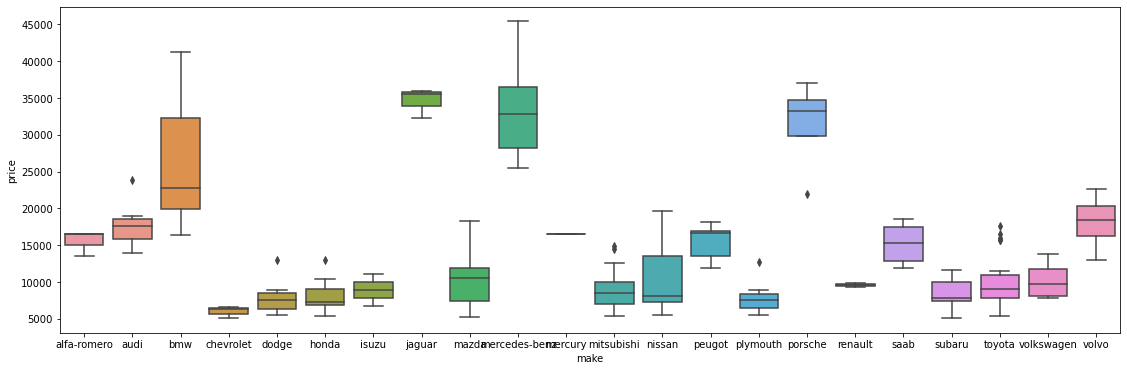

In [18]:
plt.figure(figsize=(19, 6))
sns.boxplot(x='make', y='price', data= car_price_data)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

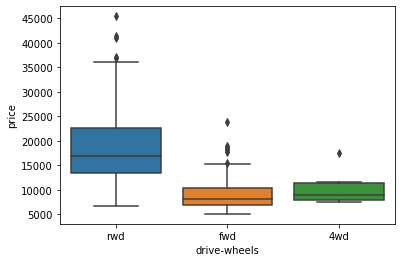

In [19]:
sns.boxplot(x='drive-wheels', y='price', data= car_price_data)

<AxesSubplot:xlabel='engine-type', ylabel='price'>

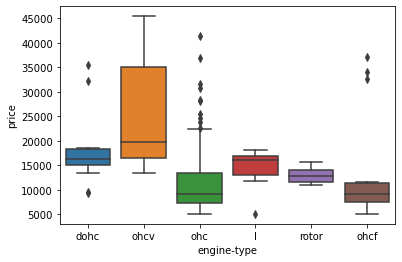

In [20]:
sns.boxplot(x='engine-type', y='price', data= car_price_data)

In [21]:
one = car_price_data[['make','price']]
grouped_one = one.groupby(['make'],as_index=False).mean().sort_values('price')
grouped_one.tail()

,make,price
21,volvo,18063.181818
2,bmw,26118.750000
15,porsche,31400.500000
9,mercedes-benz,33647.000000
7,jaguar,34600.000000


In [22]:
two = car_price_data[['drive-wheels', 'price']]
grouped_two = two.groupby(['drive-wheels'],as_index=False).mean().sort_values('price')
grouped_two

,drive-wheels,price
1,fwd,9244.779661
0,4wd,10241.000000
2,rwd,19757.613333


In [23]:
three = car_price_data[['engine-type','price']]
grouped_three = three.groupby(['engine-type'],as_index=False).mean().sort_values('price')
grouped_three

,engine-type,price
2,ohc,11567.358621
5,rotor,13020.000000
3,ohcf,13738.600000
1,l,14627.583333
0,dohc,18116.416667
4,ohcv,25098.384615


### Numeric variables.

The numeric variables highly correlated (over 80%) with price according to the correlation table are:
"curb weight", "engine size", "horsepower" and "highway-lpkm". The p-values associated with the these variables indicate statistical significance.

In [24]:
car_price_data.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-lpkm,highway-lpkm,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075776,0.279718,0.066171,-0.029807,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,0.238567,0.181189,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371297,-0.360227,0.476153,0.577576,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579688,-0.286040,0.657373,0.707108,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.614972,-0.245856,0.673363,0.736728,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086901,-0.309909,0.003811,0.084301,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.758001,-0.279349,0.785353,0.836921,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822636,-0.256755,0.745059,0.783465,0.872335
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566786,-0.267344,0.554726,0.559197,0.543154
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097598,-0.063745,0.036285,0.047199,0.082267


In [25]:
pearson_coef, p_value = stats.pearsonr(car_price_data['curb-weight'], car_price_data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P = 2.1895772388936914e-53


In [26]:
pearson_coef, p_value = stats.pearsonr(car_price_data['engine-size'], car_price_data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


In [27]:
pearson_coef, p_value = stats.pearsonr(car_price_data['horsepower'], car_price_data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8097290352560285  with a P-value of P = 5.924001027593172e-48


In [28]:
pearson_coef, p_value = stats.pearsonr(car_price_data['highway-lpkm'], car_price_data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8011176263981975  with a P-value of P = 3.046784581041283e-46


## Model Development

The equation of the MLR is:

"Price = -14382.16 + 36.76 x horsepower  + 3.50 x curb-weight + 85.33 x engine-size + 498.92 x highway-lpkm"

Additionally, the R-square value is 0.811854 indicating that approximately 81.12% of the variation in price can be explained by our model.

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()
X = car_price_data[['horsepower', 'curb-weight', 'engine-size', 'highway-lpkm']]
Y = car_price_data[['price']]
lm.fit(X, Y)

LinearRegression()

In [31]:
lm.intercept_

array([-14382.16131516])

In [32]:
lm.coef_

array([[ 36.76149419,   3.50153554,  85.32658561, 498.91963877]])

In [33]:
print('The R-square is: ', lm.score(X, car_price_data['price']))

The R-square is:  0.811854499813515


## Model evaluation.

The distribution plot below shows how well our MLR model fits the dataset given to train it. We can see that the model fits the data very well. However we need to evaluate how the model would preform in the real world by testing it on previously unseen data. To do this I used 3-fold cross validation. The mean R-square value produed by cross validation is 70.36% indicating a decrease in the fit but we can say the model still performs well when used with unseen data.

C:\Users\Heather\Documents\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Heather\Documents\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


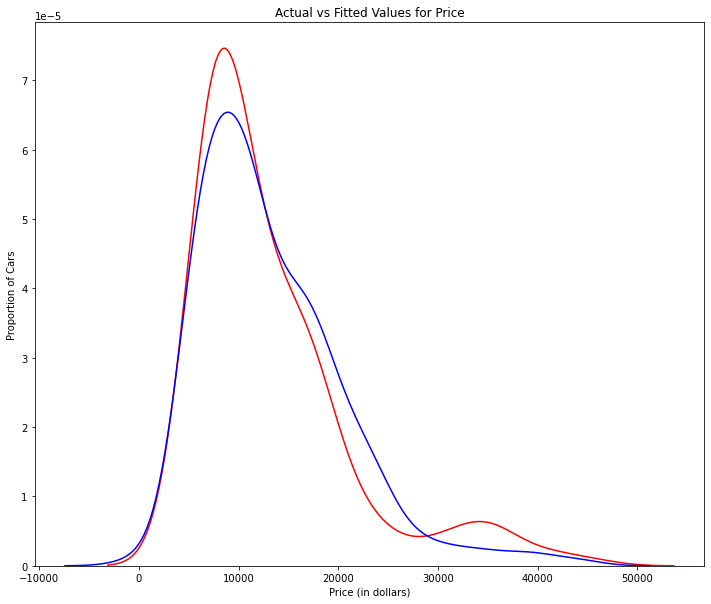

In [34]:
Y_hat = lm.predict(X)
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(car_price_data['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, X, Y, cv=3)
np.mean(scores)

0.7036440220057888

## Prediction

We now use the model to predict a recommended selling price for person X's car. We created a list of attributes for person X's car containing its horsepower, curb-weight, engine size and highway litres per 100km value, then plugged it into the MLR formula. Based on our MLR model $11 886 is the recommended selling price.

In [41]:
#car =  [horsepower: 101, 
#       curb-weight: 1291, 
#       engine-size: 164, 
#       highway-lpkm 8.103448]

In [42]:
price = -14382.16 + 36.76*(101) + 3.50*(1291) + 85.33*(164) + 498.92*(8.103448)
print("The recommended selling price for person X's car is $", price)

The recommended selling price for person X's car is $ 11886.19227616
